# CS 178 Final Code

## Group 29
### Darren Lim, Jerson Villanueva, Yingda Tao

In [37]:
import quandl
import pandas as pd
import numpy as np
import datetime

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM


#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
scaler = MinMaxScaler(feature_range=(0, 1))

## Importing Stock Data from Quandl

In [38]:
#AUTH_TOK = "geQCDVivTmjzH1dfHwDo"
quandl.ApiConfig.api_key = "geQCDVivTmjzH1dfHwDo"
#Amazon stock
AmzStk = quandl.get("WIKI/AMZN", trim_start = "2015-1-1", trim_end = "2018-1-1", collapse="daily")
#Google stock
GooStk = quandl.get("WIKI/GOOGL", trim_start = "2015-1-1", trim_end = "2018-1-1", collapse="daily")

print("Amazon Stock")
print(AmzStk.head())
print()
print("Google Stock")
print(GooStk.head())

AmzStk.sort_index(ascending=True, axis=0)
AmzStk = AmzStk.reset_index()
Aprices = AmzStk['Close'].tolist() #Y
Adates = AmzStk.index.tolist() #X

GooStk.sort_index(ascending=True, axis=0)
GooStk = GooStk.reset_index()
Gprices = GooStk['Close'].tolist() #Y
Gdates = GooStk.index.tolist() #X

Adates = np.reshape(Adates, (len(Adates), 1))
Aprices = np.reshape(Aprices, (len(Aprices), 1))

Gdates = np.reshape(Gdates, (len(Gdates), 1))
Gprices = np.reshape(Gprices, (len(Gprices), 1))

Amazon Stock
              Open    High       Low   Close     Volume  Ex-Dividend  \
Date                                                                   
2015-01-02  312.58  314.75  306.9601  308.52  2788101.0          0.0   
2015-01-05  307.01  308.38  300.8500  302.19  2774231.0          0.0   
2015-01-06  302.24  303.00  292.3800  295.29  3519034.0          0.0   
2015-01-07  297.50  301.28  295.3300  298.42  2640349.0          0.0   
2015-01-08  300.32  303.14  296.1100  300.46  3088398.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2015-01-02          1.0     312.58     314.75  306.9601      308.52   
2015-01-05          1.0     307.01     308.38  300.8500      302.19   
2015-01-06          1.0     302.24     303.00  292.3800      295.29   
2015-01-07          1.0     297.50     301.28  295.3300      298.42   
2015-01-08          1.0     300.32     303.14  296.1100 

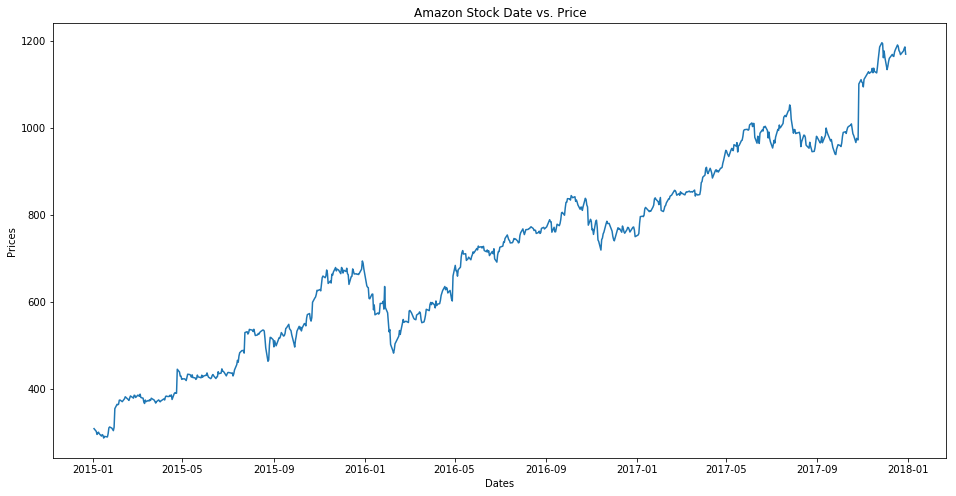

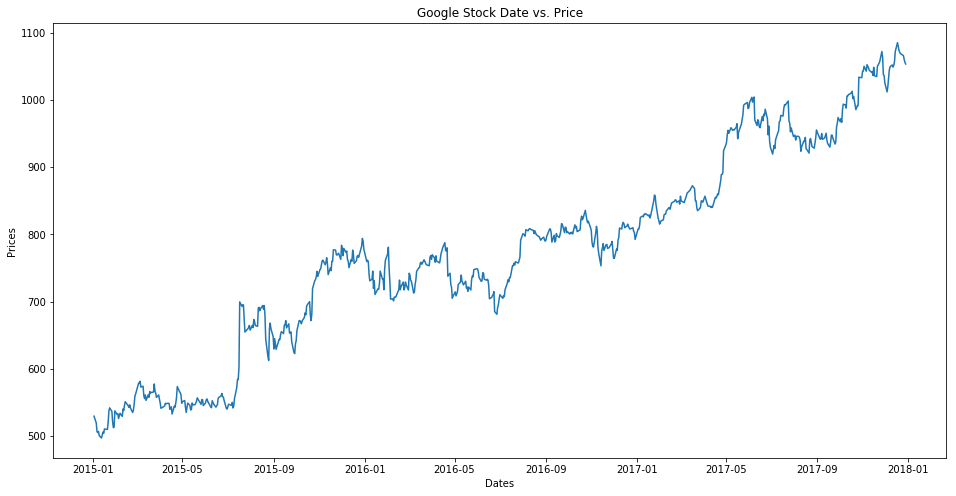

In [39]:
#Plot each of the stocks

#setting index as date
AmzStk['Date'] = pd.to_datetime(AmzStk.Date,format='%Y-%m-%d')
AmzStk.index = AmzStk['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(AmzStk['Close'], label='Close Price history')
plt.title('Amazon Stock Date vs. Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.show()

#setting index as date
GooStk['Date'] = pd.to_datetime(GooStk.Date,format='%Y-%m-%d')
GooStk.index = GooStk['Date']
#plot
plt.figure(figsize=(16,8))
plt.plot(GooStk['Close'], label='Close Price history')
plt.title('Google Stock Date vs. Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.show()

## Linear Regression

### Amazon Stock

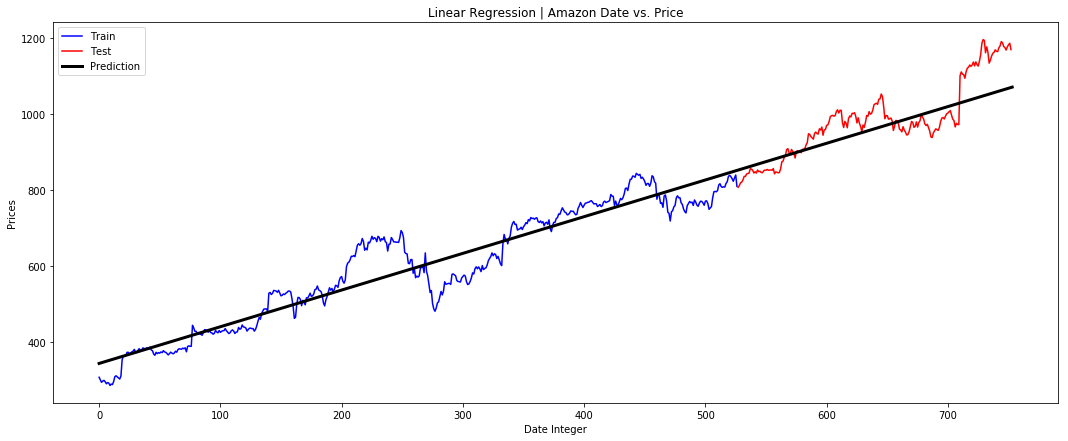

In [40]:
#30% test
#70% train
Y=AmzStk['Close'].tolist()
Xtr,Xte,Ytr,Yte = train_test_split(Adates, Y, test_size=0.30, shuffle=False)
# Create linear regression object
lr = LinearRegression()

# Train the model using the training sets
lr.fit(Xtr,Ytr)

xs = np.linspace(0,753,200)
xs = xs[:,np.newaxis]
ys = lr.predict(xs)

plt.rcParams['figure.figsize'] = (18.0, 7.0)

plt.plot(Xtr, Ytr, color='blue', label='Training')
plt.plot(Xte, Yte, color='red', label='Testing')
plt.plot(xs, ys, color='black', linewidth=3, label = 'Predicted Price')

plt.legend(["Train","Test","Prediction"])
plt.title('Linear Regression | Amazon Date vs. Price')
plt.xlabel('Date Integer')
plt.ylabel('Prices')
plt.show()

In [41]:
Ytr_pred=lr.predict(Xtr)
Yte_pred=lr.predict(Xte)

YtrPredMSE = mean_squared_error(Ytr, Ytr_pred)
YtePredMSE = mean_squared_error(Yte, Yte_pred)

print("Amazon Training set Mean Squared Error: ", YtrPredMSE)
print("Amazon Test set Mean Squared Error: ", YtePredMSE)
print("Variance Score: ", lr.score(Xte,Yte))

Amazon Training set Mean Squared Error:  2177.9771479124984
Amazon Test set Mean Squared Error:  3179.1797920969516
Variance Score:  0.6693390040249685


### Google Stock

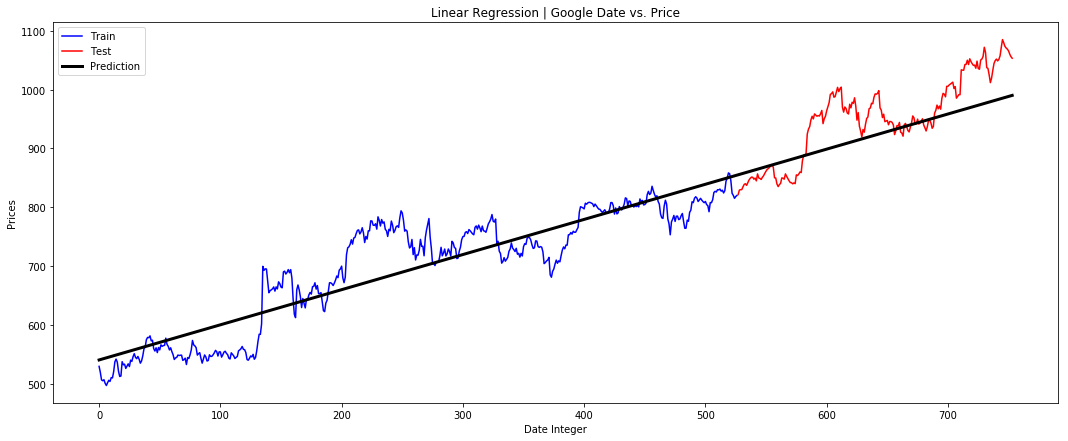

In [42]:
#30% test
#70% train
Y=GooStk['Close'].tolist()
Xtr,Xte,Ytr,Yte = train_test_split(Gdates, Y, test_size=0.30, shuffle=False)
# Create linear regression object
lr = LinearRegression()

# Train the model using the training sets
lr.fit(Xtr,Ytr)

xs = np.linspace(0,753,200)
xs = xs[:,np.newaxis]
ys = lr.predict(xs)

plt.rcParams['figure.figsize'] = (18.0, 7.0)

plt.plot(Xtr, Ytr, color='blue', label='Training')
plt.plot(Xte, Yte, color='red', label='Testing')
plt.plot(xs, ys, color='black', linewidth=3, label = 'Predicted Price')

plt.legend(["Train","Test","Prediction"])
plt.title('Linear Regression | Google Date vs. Price')
plt.xlabel('Date Integer')
plt.ylabel('Prices')
plt.show()

In [43]:
Ytr_pred=lr.predict(Xtr)
Yte_pred=lr.predict(Xte)

YtrPredMSE = mean_squared_error(Ytr, Ytr_pred)
YtePredMSE = mean_squared_error(Yte, Yte_pred)

print("Google Training set Mean Squared Error: ", YtrPredMSE)
print("Google Test set Mean Squared Error: ", YtePredMSE)
print("Variance Score: ", lr.score(Xte,Yte))

Google Training set Mean Squared Error:  1728.9202081693138
Google Test set Mean Squared Error:  2358.746833459431
Variance Score:  0.5094512231377554


## Long Short Term Memory (LSTM)

### Amazon Stock

In [44]:
#creating dataframe
data = AmzStk.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(AmzStk)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values
train = dataset[0:564,:]
valid = dataset[564:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/1
 - 32s - loss: 0.0024


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until





Amazon Test Set Mean Squared Error:  2093.4811052234627 




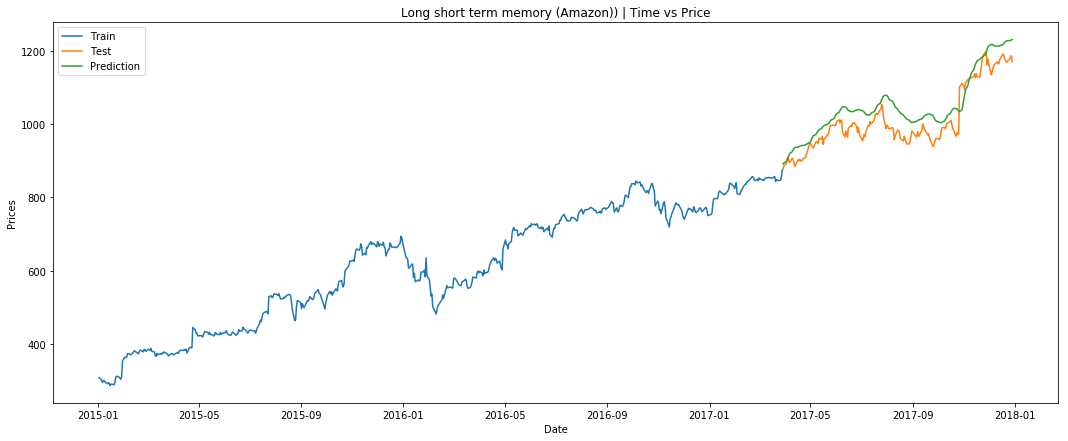

In [45]:
train = new_data[:564]
valid = new_data[564:]
valid['Predictions'] = closing_price

plt.plot(train['Close'])

plt.plot(valid[['Close','Predictions']])

#['Close','Predictions']])
plt.legend(["Train","Test","Prediction"])
plt.xlabel("Date")
plt.ylabel("Prices")
plt.title("Long short term memory (Amazon)) | Time vs Price")
print("\n\n\nAmazon Test Set Mean Squared Error: ",mean_squared_error(list(valid['Close']),list(valid['Predictions'])),"\n\n")


### Google Stock

In [47]:
data = GooStk.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(GooStk)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values
train = dataset[0:564,:]
valid = dataset[564:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/1
 - 32s - loss: 0.0043


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until





Google Test Set Mean Squared Error:  764.8406959171664 




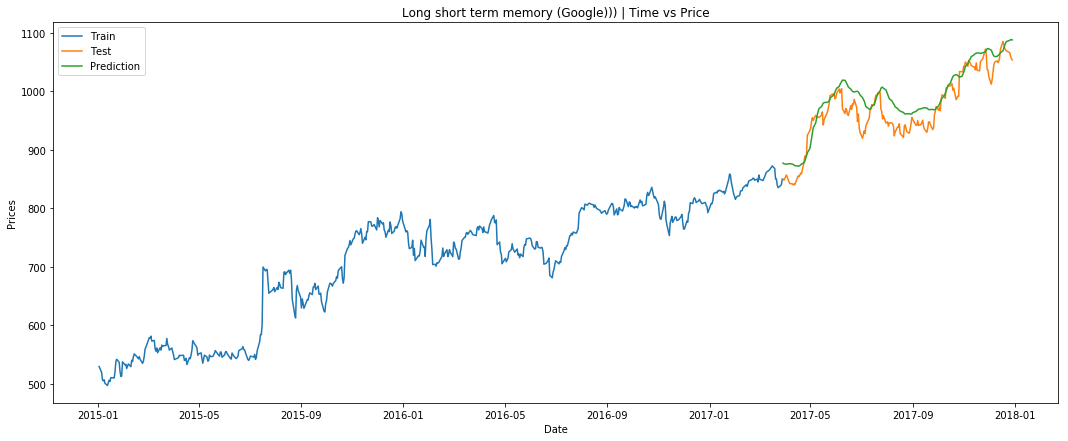

In [48]:
train = new_data[:564]
valid = new_data[564:]
valid['Predictions'] = closing_price

plt.plot(train['Close'])

plt.plot(valid[['Close','Predictions']])

#['Close','Predictions']])
plt.legend(["Train","Test","Prediction"])
plt.xlabel("Date")
plt.ylabel("Prices")
plt.title("Long short term memory (Google))) | Time vs Price")
print("\n\n\nGoogle Test Set Mean Squared Error: ",mean_squared_error(list(valid['Close']),list(valid['Predictions'])),"\n\n")
